This is the code that goes along with my [blog](https://zach-a-greenberg.medium.com/a6acc8f53c65) to demonstrate working with datetime objects in Pandas.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#I am only using the first 3 columns because they show the datetime information
df = pd.read_csv('yellow_tripdata_2020-11.csv', usecols=['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime
0,1.0,2020-11-01 00:37:37,2020-11-01 00:51:45
1,1.0,2020-11-01 00:17:41,2020-11-01 00:32:22
2,1.0,2020-11-01 00:42:29,2020-11-01 01:09:08
3,2.0,2020-11-01 00:28:59,2020-11-02 00:00:00
4,2.0,2020-11-01 00:13:26,2020-11-01 00:22:59


In [4]:
df.isna().sum()

VendorID                 99049
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
dtype: int64

In [5]:
df.dropna(subset = ['VendorID'], inplace = True)

In [6]:
#I am making sure that all of the dates in this dataset are in November of 2020.
df = df[df['tpep_pickup_datetime'].str.contains('2020-11')]

Now that we have those columns, we should check the data types. In order to work with these datetime columns, they should have the dtype of datetime. If not, we can change them.

In [7]:
df.dtypes.head()

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
dtype: object

The columns are not in proper format so in the cell below we will convert them to datetime objects.

In [8]:
df[['tpep_dropoff_datetime', 'tpep_pickup_datetime']] = df[['tpep_dropoff_datetime', 'tpep_pickup_datetime']].apply(pd.to_datetime, format = '%Y%m%d %H:%M:%S')

In [9]:
#taking the first entry of the drop off column
df['tpep_dropoff_datetime'][0]

Timestamp('2020-11-01 00:51:45')

From the output above, I am going to name it as the variable sample_date to show what we can do with it

In [10]:
sample_date = df['tpep_dropoff_datetime'][0]
print(sample_date)

2020-11-01 00:51:45


In [11]:
sample_date.month

11

In [12]:
sample_date.hour

0

As we can see from the two cells above, it is very easy to extract a specific part of the datetime object. We can also use the weekday function below to get the day of the week it is. Python will display a number of 0-6. 0 is a Monday and 6 is a Sunday.

In [13]:
sample_date.weekday()

6

Getting the differences between the two columns are as easy as subtracting them.

In [14]:
df['delta'] =  df.tpep_dropoff_datetime-df.tpep_pickup_datetime

In [15]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,delta
0,1.0,2020-11-01 00:37:37,2020-11-01 00:51:45,0 days 00:14:08
1,1.0,2020-11-01 00:17:41,2020-11-01 00:32:22,0 days 00:14:41
2,1.0,2020-11-01 00:42:29,2020-11-01 01:09:08,0 days 00:26:39
3,2.0,2020-11-01 00:28:59,2020-11-02 00:00:00,0 days 23:31:01
4,2.0,2020-11-01 00:13:26,2020-11-01 00:22:59,0 days 00:09:33


If we wanted, we can call descriptive statistical functions on the times. We can easily look at the min (the earliest) or max (the latest)

In [16]:
df.tpep_pickup_datetime.min(), df.tpep_pickup_datetime.max()

(Timestamp('2020-11-01 00:00:01'), Timestamp('2020-11-30 23:59:50'))

We can even look at the average length of time for a trip:

In [17]:
df.delta.mean()

Timedelta('0 days 00:14:22.929241522')

In [18]:
#converting the column into seconds to unify the measure.
df['delta'] = df['delta'].dt.total_seconds()

In [19]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,delta
0,1.0,2020-11-01 00:37:37,2020-11-01 00:51:45,848.0
1,1.0,2020-11-01 00:17:41,2020-11-01 00:32:22,881.0
2,1.0,2020-11-01 00:42:29,2020-11-01 01:09:08,1599.0
3,2.0,2020-11-01 00:28:59,2020-11-02 00:00:00,84661.0
4,2.0,2020-11-01 00:13:26,2020-11-01 00:22:59,573.0


In the cells below we are essentially grouping the data by date and getting the average trip time per day.

In [20]:
df.resample('D', on = 'tpep_pickup_datetime')['delta'].mean().head()

tpep_pickup_datetime
2020-11-01    1071.108299
2020-11-02     862.022009
2020-11-03     797.714351
2020-11-04     816.123845
2020-11-05     873.967380
Freq: D, Name: delta, dtype: float64

We can just as easily graph it with the .plot() method.

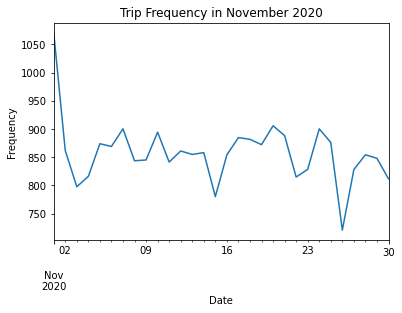

In [21]:
df.resample('D', on = 'tpep_pickup_datetime')['delta'].mean().plot()
plt.title('Trip Frequency in November 2020')
plt.xlabel('Date')
plt.ylabel('Frequency');

Using the dt.day attribute, we can get all of the data for a specific day. I am using the 26th because this was Thanksgiving Day of 2020.

In [22]:
thanksgiving = df[df['tpep_pickup_datetime'].dt.day == 26]

thanksgiving.delta.mean()

720.9173267976716

We can use the Thanksgiving day data, and filter down the hour of the trips. This can tell us the most common hours in which trips were taken.

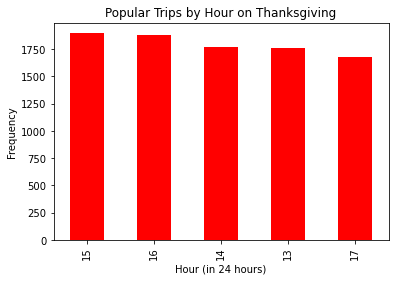

In [23]:
thanksgiving['tpep_pickup_datetime'].dt.hour.value_counts().head().plot.bar(color = 'red')
plt.title('Popular Trips by Hour on Thanksgiving')
plt.xlabel('Hour (in 24 hours)')
plt.ylabel('Frequency');